In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython.display import Video # new module

[  1807.   1749.   1694. ... -14264. -14888. -15489.]
[    0     1     2 ... 25197 25198 25199]
[0.00000000e+00 8.33333333e-04 1.66666667e-03 ... 2.09975000e+01
 2.09983333e+01 2.09991667e+01]


Text(0, 0.5, 'Velocity')

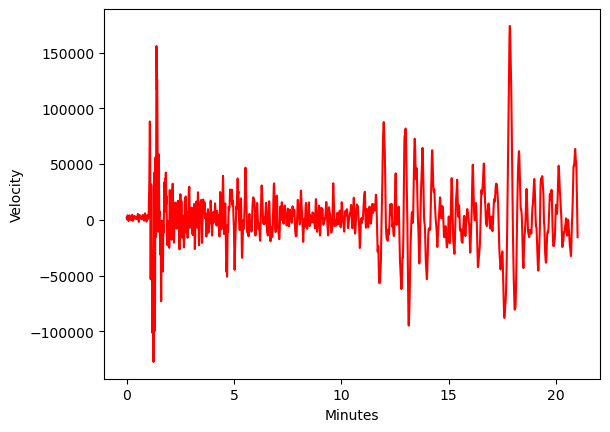

In [87]:
EQ = np.loadtxt('../Datasets/seismicRecord/earthquake.txt')
velocity = np.loadtxt('../Datasets/seismicRecord/earthquake.txt')
print(velocity)
time_units = np.arange(len(velocity))
print(time_units)
minutes = time_units / 1200.0
print(minutes)
plt.plot(minutes, velocity, '-r')
plt.xlabel('Minutes')
plt.ylabel('Velocity')

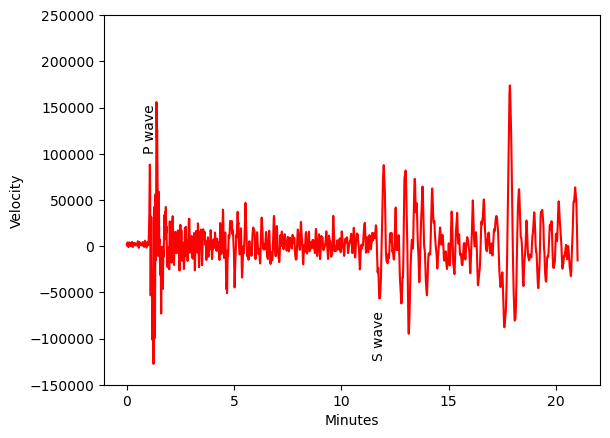

In [72]:
# Same plot as before: 
plt.plot(minutes, velocity, 'r-') # Plot data as a red line.
plt.xlabel('Minutes') # Insert a label on the X axis.
plt.ylabel('Velocity') # Insert a label on the Y axis.
plt.text(1.08, 100000, 'P wave', rotation=90, va='bottom', ha='center')
plt.text(11.76, -70000, 'S wave', rotation=90, va='top', ha='center')
plt.ylim([-150000, 250000])
plt.savefig('seismogram.png')

In [73]:
open('../Datasets/TravelTimeDelta/DeltaTime.txt').readlines()[0:10]

['https://earthquake.usgs.gov/learn/topics/ttgraph.php\n',
 'Delta Time of P  S-P Time\n',
 '  Deg   M   S     M   S\n',
 '  0.0   0   5.4   0   4.0\n',
 '  0.5   0  10.6   0   7.8\n',
 '  1.0   0  17.7   0  13.5\n',
 '  1.5   0  24.6   0  19.0\n',
 '  2.0   0  31.4   0  24.4\n',
 '  2.5   0  38.3   0  29.9\n',
 '  3.0   0  45.2   0  35.4\n']

In [74]:
open('../Datasets/TravelTimeDelta/DeltaTime.txt').readlines()[-10:]

[' 96.0  13  23.6  11  16.1\n',
 ' 97.0  13  28.1  11  20.1\n',
 ' 98.0  13  32.6  11  24.1\n',
 ' 99.0  13  37.0  11  28.1\n',
 '100.0  13  41.5  11  32.0\n',
 '101.0  13  45.9  11  35.8\n',
 '102.0  13  50.4  11  39.7\n',
 '103.0  13  54.8  11  43.6\n',
 '104.0  13  59.2  11  47.5\n',
 '105.0  14   3.7  11  51.4\n']

In [75]:
import pandas as pd

DeltaTimeData = pd.read_csv('../Datasets/TravelTimeDelta/DeltaTime.txt', \
                            delim_whitespace=True, skiprows=2, header=0)

DeltaTimeData.head()

,Deg,M,S,M.1,S.1
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


In [76]:
DeltaTimeData.columns

Index(['Deg', 'M', 'S', 'M.1', 'S.1'], dtype='object')

In [77]:
DeltaTimeData.columns = ['Degrees', 'P_wave_minutes', 'P_wave_seconds', 'S-P_minutes', 'S-P_seconds']
DeltaTimeData.tail()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds
111,101.0,13,45.9,11,35.8
112,102.0,13,50.4,11,39.7
113,103.0,13,54.8,11,43.6
114,104.0,13,59.2,11,47.5
115,105.0,14,3.7,11,51.4


In [78]:
DeltaTimeData.to_csv('PSArrival.csv', index=False)

In [79]:
DeltaTimeData.to_csv('PSArrival.txt', sep='\t', index=False)

In [80]:
DeltaTimeData['P_decimal_minutes'] = DeltaTimeData['P_wave_minutes'] + (DeltaTimeData['P_wave_seconds']/60)

DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000
1,0.5,0,10.6,0,7.8,0.176667
2,1.0,0,17.7,0,13.5,0.295000
3,1.5,0,24.6,0,19.0,0.410000
4,2.0,0,31.4,0,24.4,0.523333


In [81]:
# Convert delay time to decimal minutes. 
DeltaTimeData['SP_decimal_minutes'] = DeltaTimeData['S-P_minutes'] + (DeltaTimeData['S-P_seconds'] / 60)

# Calculate S wave arrival time in minutes
DeltaTimeData['S_decimal_minutes'] = DeltaTimeData['P_decimal_minutes'] + DeltaTimeData['SP_decimal_minutes']

DeltaTimeData.head()


,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000,0.066667,0.156667
1,0.5,0,10.6,0,7.8,0.176667,0.130000,0.306667
2,1.0,0,17.7,0,13.5,0.295000,0.225000,0.520000
3,1.5,0,24.6,0,19.0,0.410000,0.316667,0.726667
4,2.0,0,31.4,0,24.4,0.523333,0.406667,0.930000


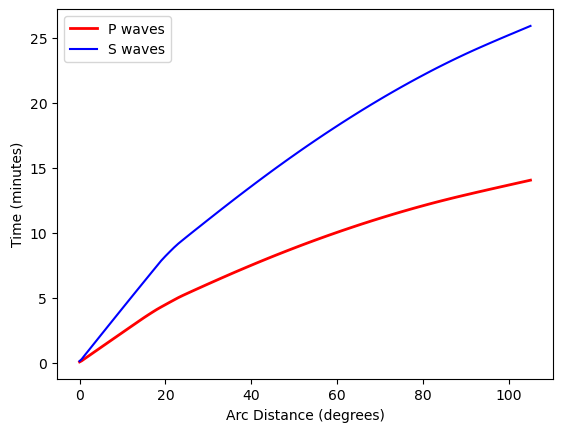

In [82]:
plt.plot(DeltaTimeData['Degrees'], DeltaTimeData['P_decimal_minutes'], 'r-', label='P waves', linewidth = 2)
plt.plot(DeltaTimeData['Degrees'], DeltaTimeData['S_decimal_minutes'], 'b-', label = 'S waves')
plt.xlabel('Arc Distance (degrees)')
plt.ylabel('Time (minutes)')
plt.legend(loc=2)

In [83]:
EQ = pd.DataFrame([minutes, velocity])
EQ.head()

,0,1,2,3,4,5,6,7,8,9,...,25190,25191,25192,25193,25194,25195,25196,25197,25198,25199
0,0.0,0.000833,0.001667,0.0025,0.003333,0.004167,0.005,0.005833,0.006667,0.0075,...,20.991667,20.9925,20.993333,20.994167,20.995,20.995833,20.996667,20.9975,20.998333,20.999167
1,1807.0,1749.000000,1694.000000,1618.0000,1516.000000,1394.000000,1282.000,1198.000000,1077.000000,957.0000,...,-9275.000000,-10063.0000,-10806.000000,-11515.000000,-12214.000,-12915.000000,-13599.000000,-14264.0000,-14888.000000,-15489.000000


In [84]:

EQ = pd.DataFrame([minutes, velocity]).transpose()
EQ.columns = ['Minutes', 'Velocity']
EQ.head()

,Minutes,Velocity
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


In [85]:
EQ.to_csv('minutes_velocity.csv', index=None)
DeltaTimeData.to_csv('DeltaTimeData.csv', index=None)

In [86]:
# cleanup
os.remove('seismogram.png')
os.remove('PSArrival.csv') 
os.remove('PSArrival.txt') 
# this command will delete anything that starts with PSArrival.
os.remove('minutes_velocity.csv') # I already put this into the next Lecture so don't worry.  
os.remove('DeltaTimeData.csv')